In [1]:
import json
import sys
import os

# parent_dir = os.path.abspath(os.getcwd())
# vendor_dir = os.path.join(parent_dir, 'vendor')
# sys.path.append(vendor_dir)

# from tripadvisorCrawler.items import ReviewItem

from items import *
from dataframe import *

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import numpy as np

import calendar
from ggplot import *

In [2]:
# data open and auto parse

with open('data/review_items.jl', 'r') as f:
    raw = f.read()

reviews = as_dataframe(raw)

with open('data/hotel_items.jl','r') as f:
    raw = f.read()

hotels = as_dataframe(raw)

In [3]:
## show case hotels
hotels.head(3)

,batch_id,description,item_id,item_title,site_name,url
0,20160920153033,"The Merrion Hotel, Dublin: See 2,572 traveller...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nThe Merrion Hotel\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
1,20160920153033,"Aberdeen Lodge, Dublin: See 448 traveller revi...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAberdeen Lodge\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...
2,20160920153033,"Ariel House, Dublin: See 1,231 traveller revie...",https://www.tripadvisor.ie/Hotel_Review-g18660...,\nAriel House\n,TripAdvisor,https://www.tripadvisor.ie/Hotel_Review-g18660...


In [4]:
# number of hotels
hotels.shape[0]

157

In [5]:
# show case reviews
reviews.head(3)

,batch_id,item_id,rating,rating_percentage,review_id,review_text,review_title,site_name,timestamp_rating,url,user_id
0,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_419380945,\nWe were there for a very short time only but...,“Was fab!”,TripAdvisor,2016-09-17,https://www.tripadvisor.ie//ShowUserReviews-g1...,70C106C794E866B6CC8EB2CEAB5065AE
1,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,5,1.00,review_418509752,"\ngo early enjoy every minute, you will not re...",“wonderful”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,70A6646B5249D0F77159284DF06BC0FF
2,20160920153033,https://www.tripadvisor.ie/Hotel_Review-g18660...,4,0.75,review_418590298,\nCool place. Neat mix of old castle and moder...,“good.”,TripAdvisor,2016-09-14,https://www.tripadvisor.ie//ShowUserReviews-g1...,54208AF58C1AF1669E07392020DE0545


In [6]:
#summary of rating of dublin hotels
reviews.ix[:,['rating']].describe()

,rating
count,132496.000000
mean,4.102290
std,1.073778
min,1.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,5.000000


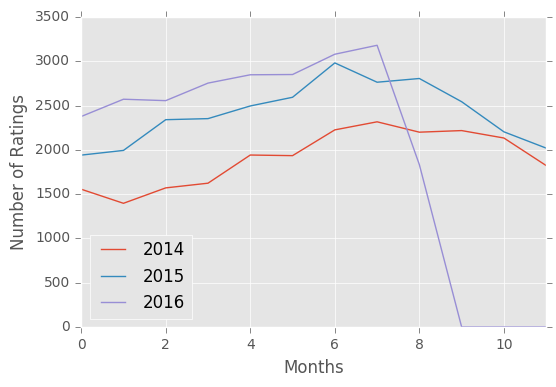

In [7]:
# reviews['rating_date'] = pd.to_datetime(reviews['rating_date'], format='%Y-%m-%dT%H:%M:%S')
# timeseries = reviews.set_index('rating_date')
timeseries = reviews.set_index('timestamp_rating')

ts2014 = timeseries['2014-01-01':'2014-12-31'].ix[:,'rating'].resample('M').count()
ts2015 = timeseries['2015-01-01':'2015-12-31'].ix[:,'rating'].resample('M').count()
ts2016 = timeseries['2016-01-01':'2016-12-31'].ix[:,'rating'].resample('M').count()

# months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_factor = calendar.month_abbr[1:13]
year_factor = ['2014','2015','2016']

xlabel = 'Month'
ylabel = 'Ratings'


# df4 = pd.DataFrame({xlabel:ts2014.index, ylabel:ts2014.values})
df4 = pd.DataFrame({xlabel:month_factor, ylabel:ts2014.values})
df5 = pd.DataFrame({xlabel:month_factor, ylabel:ts2015.values})

pad_x3_index = pd.date_range('1/1/2016',periods=12,freq='M')
# print(pad_x3_index)
ts2016=ts2016.reindex(pad_x3_index).fillna(0)

df6 = pd.DataFrame({xlabel:month_factor, ylabel:ts2016.values})

# new timestamp series
# newts = pd.concat([df1,df2,df3])
# newts.set_index(xlabel,inplace=True)

# http://stackoverflow.com/questions/37596714/compare-multiple-year-data-on-a-single-plot-python
ax4 = df4.plot()
ax5 = df5.plot(ax=ax4)
finalPlot = df6.plot(ax=ax5)
finalPlot.legend(['2014','2015','2016'],loc='best')
finalPlot.set_ylabel('Number of Ratings')
finalPlot.set_xlabel('Months')

# http://blog.yhat.com/posts/aggregating-and-plotting-time-series-in-python.html
# custom all...


months_f = pd.Series(np.tile(month_factor,3)).astype('category')
years_f = pd.Series(np.repeat(year_factor,12)).astype('category')

# 我快吐血了， 为了这个自定义的plot
custom = pd.DataFrame({
        'Month':months_f,
        'Ratings':np.array([ts2014.values,ts2015.values,ts2016.values]).flatten(),
        'Year':years_f
    })

# ggplot(aes(x = 'Month', y = 'Ratings'), custom) + geom_line()
# ggplot(aes(x='Month',y='Ratings',colour='Year'),custom) + geom_line()


In [8]:




# newts['Month'] = map(lambda x: cal.month_abbr[x.month], newts.index)
# newts['Year'] = map(lambda x: str(x.year), newts.index)
# newts['Year'] = newts['Year'].astype('category')

# print('before melt: ')
# print(newts.head(6))

# newts.plot()

# df4 = pd.melt(nots, id_vars=['Month','Year'],value_vars=['rating_count'])

# print("melted: ")
# print(type(df4))
# print(df4.head(3))

# from ggplot import ggplot, ggtitle, geom_line, aes
# p1 = ggplot(aes(x=xlabel, y=ylabel), df1) + geom_line()
# p2 = ggplot(aes(x=xlabel, y=ylabel), df2) + geom_line()
# p3 = ggplot(aes(x=xlabel, y=ylabel), df3) + geom_line()

# p1.show()
# p2.show()
# p3.show()

# ggplot(aes(x='Month', y='rating_count',colour='Year'),nots)+geom_line() + ggtitle("Monthly Rating Count for last 2 years")

In [9]:
reviewByHotels = reviews.groupby('item_id')

In [10]:
import pandas as pd
for hotel_url, group in reviewByHotels:
    subset = group.ix[:,['timestamp_rating', 'rating']]
    summary = subset.ix[:,'rating'].describe()
#     print(summary)
#     subset['rating_date'] = pd.to_datetime(subset['rating_date'], format='%Y-%m-%dT%H:%M:%S')
    subset.set_index('timestamp_rating',inplace=True)
    ## Do my own thing: input is subset of rating with timestamp index. output is bin
    ## count for last 2 years of rating on a weekly span.
    
    
    
    
    
#     print(subset.resample('AS').count()) # annual start
#     last2years = pd.date_range('2014-01-01','2016-09-01')
#     last2years = pd.period_range('2014','2016')
#     print(last2years)
#     weeklyCount = subset['2014-01-01':'2016-09-01'].resample('AS').count()
    print(subset['2014-01-01':'2016-09-01'].resample('AS').count())
#     print(weeklyCount)
#     print(subset["2014-01-01":"2016-09-01"])
        


                  rating
timestamp_rating        
2016-01-01            22
                  rating
timestamp_rating        
2014-01-01             1
2015-01-01             1
                  rating
timestamp_rating        
2014-01-01           195
2015-01-01           204
2016-01-01             6
                  rating
timestamp_rating        
2015-01-01             1
                  rating
timestamp_rating        
2014-01-01            40
2015-01-01            34
2016-01-01            38
                  rating
timestamp_rating        
2014-01-01           684
2015-01-01           868
2016-01-01           605
                  rating
timestamp_rating        
2014-01-01           151
2015-01-01           182
2016-01-01           143
                  rating
timestamp_rating        
2014-01-01           198
2015-01-01           309
2016-01-01           228
                  rating
timestamp_rating        
2014-01-01           670
2015-01-01           619
2016-01-01           518
